### Session 0.0: Load packages and customised functions

In [9]:
%reload_ext autoreload
%autoreload 2

In [10]:
from Z_compatibility import access_utilities
access_utilities()

In [11]:
## a useful function to generate a data list for further analysis
import os,json,sys,itertools
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from locustvr_converter import preprocess_matrex_data
from locustvr_extractor import extract_locustvr_dat
from behavioural_classification import classify_heading_direction
from trajectory_analysis import *
##need to add this additional cell because useful tools are in another folder. Need to integrate these two folders one day
current_working_directory = Path.cwd()
parent_dir = current_working_directory.resolve().parents[0]
sys.path.insert(0, str(parent_dir) + "\\utilities")
from useful_tools import select_animals_gpt,find_file,read_seq_config
from data_cleaning import findLongestConseqSubseq,interp_fill

#### Session 0.1: Load analysis methods in python dictionary form

In [17]:
json_file = "./analysis_methods_dictionary.json"
with open(json_file, "r") as f:
    analysis_methods = json.loads(f.read())
    

#Put the folder of your Unity experiment below
#thisDataset ="D:/MatrexVR_Swarm_Data/RunData"
#thisDataset ="D:/MatrexVR_blackbackground_Data/RunData"
#thisDataset ="D:/MatrexVR_grass1_Data/RunData"
#thisDataset ="D:/MatrexVR_navigation_Data/RunData"
#thisDataset ="D:/MatrexVR_2024_Data/RunData"
thisDataset ="/Volumes/AG_Couzin-Fuchs/DATA/experiment_trackball_Optomotor/locustVR"
#parameter name means independent variable in the experiment
#variable_name='kappa' 
#variable_name='mu'
variable_name='location'
#variable_name='initial_position'
#variable_name='agent_speed'
exp_name=analysis_methods.get("experiment_name")

#### Session 0.2: Load animals' experiment directory into a list

In [18]:
## this cell searches for a folder with csv files, usually that is the folder saving the tracking data.
## Since data from the 4 VRs are saved in the same folder, this command will return that one folder for the 4 experiment
dir_list = []
if exp_name =="locustvr":
    file_type=".dat"
else:
    file_type=".csv"
for root, dirs, files in os.walk(thisDataset):
    for folder in dirs:
        folder_path=os.path.join(root,folder)
        if any(name.endswith(file_type) for name in os.listdir(folder_path)):
            dir_list.append(folder_path.replace("\\", "/"))

print(f"these directories are found {dir_list}")
dir_list.sort()

these directories are found ['/Volumes/AG_Couzin-Fuchs/DATA/experiment_trackball_Optomotor/locustVR/GN25001/20250624/choices/session1', '/Volumes/AG_Couzin-Fuchs/DATA/experiment_trackball_Optomotor/locustVR/GN25002/20250624/choices/session1', '/Volumes/AG_Couzin-Fuchs/DATA/experiment_trackball_Optomotor/locustVR/GN25003/20250624/choices/session1', '/Volumes/AG_Couzin-Fuchs/DATA/experiment_trackball_Optomotor/locustVR/GN25004/20250624/choices/session1', '/Volumes/AG_Couzin-Fuchs/DATA/experiment_trackball_Optomotor/locustVR/GN25005/20250624/choices/session1', '/Volumes/AG_Couzin-Fuchs/DATA/experiment_trackball_Optomotor/locustVR/GN25006/20250625/choices/session1', '/Volumes/AG_Couzin-Fuchs/DATA/experiment_trackball_Optomotor/locustVR/GN25007/20250625/choices/session1', '/Volumes/AG_Couzin-Fuchs/DATA/experiment_trackball_Optomotor/locustVR/GN25008/20250625/choices/session1', '/Volumes/AG_Couzin-Fuchs/DATA/experiment_trackball_Optomotor/locustVR/GN25009/20250625/choices/session1', '/Volume

#### Session 0.3: pass temperature information into each folder

In [19]:
##This cell is used to move data of the thermo-humidity logger to animals'folder
import shutil
tmp_file_name='locustVR_20250624_2050628.txt'
#tmp_file_name='DL220THP_Thermo2_241012_241014.csv'
#tmp_file_name='DL220THP_Thermo3_250618.csv'
tmp_source=os.path.join('Z:/Users/chiyu',tmp_file_name)
for this_dir in dir_list:
    tmp_new_dir = os.path.join(this_dir,tmp_file_name)
    if os.path.isfile(tmp_new_dir):
        print("Found EL USB temperature file in the new directory already")
    else:
        shutil.copy(tmp_source, tmp_new_dir)

Found EL USB temperature file in the new directory already
Found EL USB temperature file in the new directory already
Found EL USB temperature file in the new directory already
Found EL USB temperature file in the new directory already
Found EL USB temperature file in the new directory already
Found EL USB temperature file in the new directory already
Found EL USB temperature file in the new directory already
Found EL USB temperature file in the new directory already
Found EL USB temperature file in the new directory already
Found EL USB temperature file in the new directory already
Found EL USB temperature file in the new directory already
Found EL USB temperature file in the new directory already
Found EL USB temperature file in the new directory already
Found EL USB temperature file in the new directory already
Found EL USB temperature file in the new directory already
Found EL USB temperature file in the new directory already
Found EL USB temperature file in the new directory alrea

### Session 1.0: Create curated dataset based on a list of experiment directories

no curated locustvr h5 database in /Volumes/AG_Couzin-Fuchs/DATA/experiment_trackball_Optomotor/locustVR/GN25001/20250624/choices/session1. Create curated file
                     Temperature ˚C (ºC)  Relative Humidity (%)  Dew Point(°C)
Time                                                                          
2025-06-24 11:44:00                 32.0                   29.5           12.0


/Users/aljoscha/PycharmProjects/VTK_LocustVR/UnityDataAnalysis-main/locustvr_extractor.py:144: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_this_trial['preChoice_relativeX']=pd_this_trial['preChoice_relativeX']+X
/Users/aljoscha/PycharmProjects/VTK_LocustVR/UnityDataAnalysis-main/locustvr_extractor.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_this_trial['preChoice_relativeY']=pd_this_trial['preChoice_relativeY']+Y
/Users/aljoscha/PycharmProjects/VTK_LocustVR/UnityDataAnalysis-main/locustvr_e

let's check


/Users/aljoscha/PycharmProjects/VTK_LocustVR/UnityDataAnalysis-main/locustvr_extractor.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agent2.loc[:,'agent_id']=list(np.ones(agent2.shape[0], dtype=int)*2)
/Users/aljoscha/PycharmProjects/VTK_LocustVR/UnityDataAnalysis-main/locustvr_extractor.py:144: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_this_trial['preChoice_relativeX']=pd_this_trial['preChoice_relativeX']+X
/Users/aljoscha/PycharmProjects/VTK_LocustVR/UnityDataAnalysis-main/locustvr_extracto

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x138256700> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

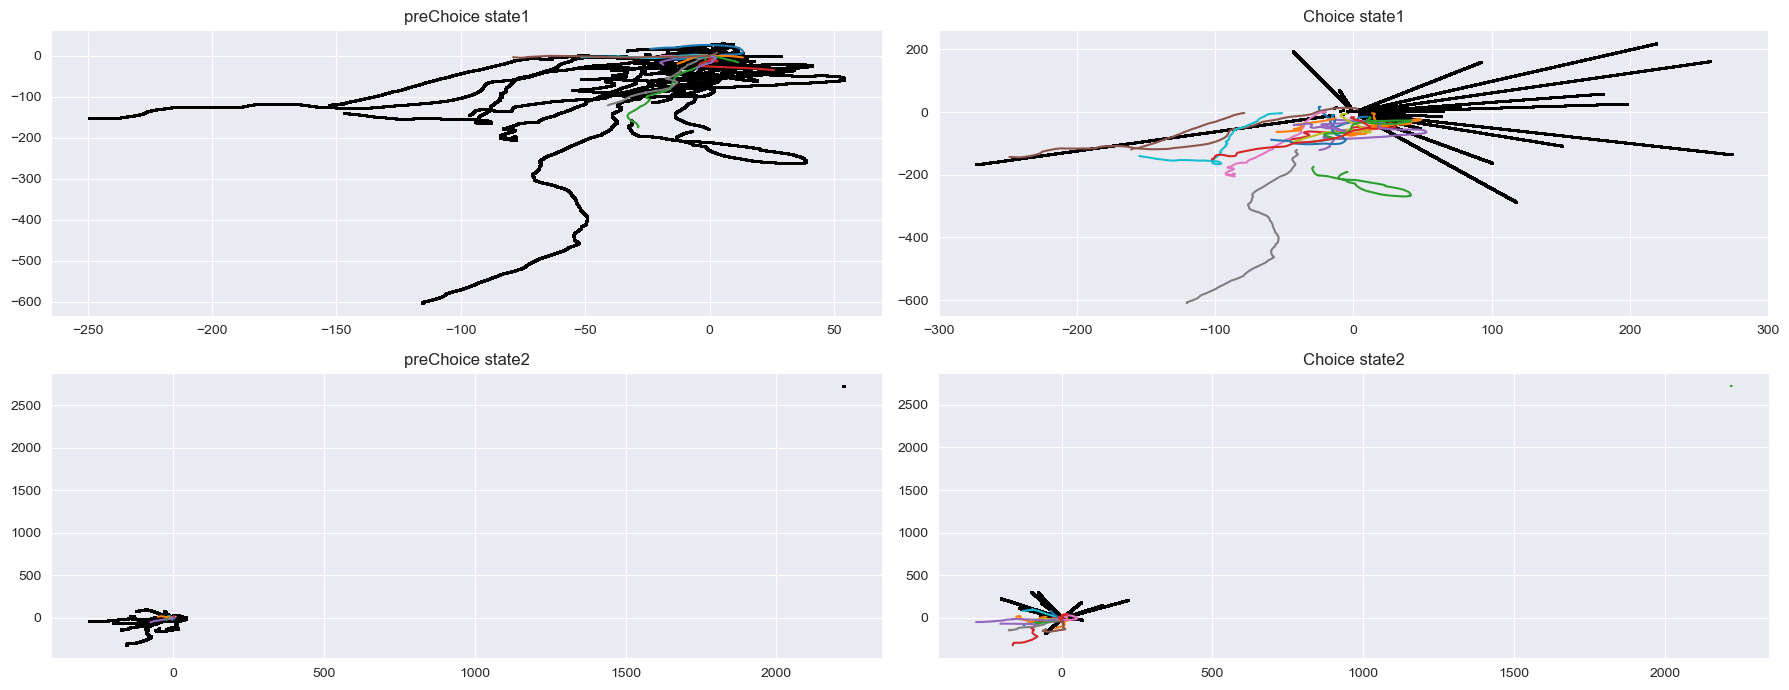

In [20]:
#This function receives directory path that contains the 4-VR data and save the tracking + stimulus information as h5 file
pattern="*.h5"
#pattern="VR*.parquet"
for this_dir in dir_list:
    if "archive" in this_dir:
        print(f"skip archive folder for {this_dir}")
        continue
    if any(Path(this_dir).glob(pattern)) and analysis_methods.get("overwrite_curated_dataset")==False:
        print(f"curated matrexvr h5 database found in {this_dir}. Skip this file")
        continue
    elif exp_name =="locustvr":
        print(f"no curated locustvr h5 database in {this_dir}. Create curated file")
        extract_locustvr_dat(this_dir,analysis_methods)
    else:
        print(f"no curated matrexvr h5 database in {this_dir}. Create curated file")
        preprocess_matrex_data(this_dir,analysis_methods)

### Session 2.0: analyse animal's trajectory

#### Session 2.1: select animal based on condition and return which a directory list and a list of vr rig number to specify which animal to analyse

In [ ]:
# build up dir_list of animals based on condition.
dir_list = []
file_type=".h5"
using_google_sheet=True
sheet_name = "Unity_MatrexVR"
scene_name=analysis_methods.get("experiment_name")
if analysis_methods.get("load_individual_data") == True:
    if using_google_sheet==True:
        database_id = "1UL4eEUrQMapx9xz11-IyOSlPBcep1I9vBJ2uGgVudb8"
                #https://docs.google.com/spreadsheets/d/1UL4eEUrQMapx9xz11-IyOSlPBcep1I9vBJ2uGgVudb8/edit?usp=sharing
        url = f"https://docs.google.com/spreadsheets/d/{database_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"
        #df = pd.read_excel(url, engine='openpyxl')## use this function if the file is not google sheet but uploaded excel file
        df = pd.read_csv(url)
    else:
        excel_file_path = "Z:/DATA/experiment_trackball_Optomotor/Locusts Management.xlsx"
        print(f"using a database {excel_file_path} from the server but this file might be outdated")
        # Create a 'with' statement to open and read the Excel file
        with pd.ExcelFile(excel_file_path) as xls:
            # Read the Excel sheet into a DataFrame with the sheet name (folder name)
            df = pd.read_excel(xls, sheet_name)
        ##list up the conditions and answers as strings for input argument to select animal. One condition must pair with one answer
    if analysis_methods.get("select_animals_by_condition") == True:
       #animal_of_interest=select_animals_gpt(df,"Independent variable (list up all of them in the experiment)","gregarious_leader_grass","Excluding this animal from analysis (Usually when animals die or molt, T/F)","F")
       #animal_of_interest=select_animals_gpt(df,"Independent variable (list up all of them in the experiment)","gregarious_leader_black")
        #animal_of_interest=select_animals_gpt(df,"Independent variable (list up all of them in the experiment)",variable_name,"Excluding this animal from analysis (Usually when animals die or molt, T/F)","F")
        #animal_of_interest=select_animals_gpt(df,"Independent variable1",variable_name,"Independent variable2","bifuration_vr_locust_sta_black_locust","Excluding this animal from analysis (Usually when animals die or molt, T/F)","F")
        animal_of_interest=select_animals_gpt(df,"Independent variable2","marching_band_black_vs_leader_locust_animated_vs_inanimated","Excluding this animal from analysis (Usually when animals die or molt, T/F)","F")
        #animal_of_interest=select_animals_gpt(df,"Independent variable2","marching_band_black_vs_leader_locust_constant_speed&distance","Excluding this animal from analysis (Usually when animals die or molt, T/F)","F")
        #animal_of_interest=select_animals_gpt(df,"Independent variable (list up all of them in the experiment)",variable_name)
    else:
        animal_of_interest=df
    folder_name=animal_of_interest["folder name"].values
    dir_tile=np.tile(thisDataset, (len(folder_name), 1))
    vr_no=animal_of_interest["VR number"].values
    vr_no = vr_no.astype('int')
    no_food=animal_of_interest["Food retriction (-1 or the number of hours)"].values
    no_food = no_food.astype('int')
    dir_list = [''.join([x[0], '/', y]) for x,y in zip(dir_tile,folder_name)]
    dir_dict = zip(dir_list, vr_no.tolist())
else:
    for root, dirs, files in os.walk(thisDataset):
        for folder in dirs:
            folder_path=os.path.join(root,folder)
            if any(name.endswith(file_type) for name in os.listdir(folder_path)):
                dir_list.append(folder_path.replace("\\", "/"))

In [ ]:
dir_list=dir_list[17:]
vr_no=vr_no[17:]

#### Session 2.2: load hdf files and sequence config of those animals and create a common index between each others

In [ ]:
trial_evaluation_list=[]
raster_list=[]
seq_config_list=[]
animal_id=0
for this_dir,this_vr in zip(dir_list,vr_no):
    if analysis_methods.get("time_series_analysis")==True:
        summary_pattern = f"VR{this_vr}*score_full.h5"
        xy_pattern = f"VR{this_vr}*XY_full.h5"
    else:
        summary_pattern = f"VR{this_vr}*score.h5"
        xy_pattern = f"VR{this_vr}*XY.h5"
    found_result = find_file(Path(this_dir), summary_pattern)     
    trial_evaluation = pd.read_hdf(found_result)
    trial_evaluation['VR'] = np.tile(f"VR{this_vr}", (len(trial_evaluation), 1))
    trial_evaluation['VR'] =trial_evaluation["VR"]+"_"+trial_evaluation["fname"]
    trial_evaluation.insert(0, 'animal_id',np.repeat(animal_id,trial_evaluation.shape[0]))
    trial_evaluation_list.append(trial_evaluation)
    found_result = find_file(Path(this_dir), xy_pattern)        
    dfxy = pd.read_hdf(found_result)
    dfxy['VR'] = np.tile(f"VR{this_vr}", (len(dfxy), 1))
    dfxy['VR'] =dfxy["VR"]+"_"+dfxy["fname"]
    dfxy.insert(0, 'animal_id',np.repeat(animal_id,dfxy.shape[0]))
    raster_list.append(dfxy)
    seq_config_pattern=f"*sequenceConfig.json"
    seq_config_file=find_file(Path(this_dir), seq_config_pattern)
    seq_config_pd=read_seq_config(seq_config_file)
    seq_config_pd['VR']=trial_evaluation['VR'].values
    seq_config_pd.insert(0, 'step_id',np.arange(seq_config_pd.shape[0]))
    seq_config_pd.insert(0, 'animal_id',np.repeat(animal_id,seq_config_pd.shape[0]))
    seq_config_list.append(seq_config_pd)
    animal_id +=1

#### Session 2.2.1: concatenate animal's data from the list into a big pandas dataframe

In [ ]:
trial_evaluation_all=pd.concat(trial_evaluation_list)
seq_config_all=pd.concat(seq_config_list)
raster_all=pd.concat(raster_list)

#### Session 2.2.1.5: check each animal's walking distance durning ISI

In [ ]:
trial_evaluation_all[['VR_num', 'Date','Time']] = trial_evaluation_all['VR'].str.split('_', expand=True)
trial_evaluation_ISI=trial_evaluation_all[trial_evaluation_all['density']==0]
ISI_evaluation_aba = trial_evaluation_ISI.groupby('animal_id').agg(
    travel_distance=('distTotal', 'mean'),
    vr_no=('VR_num', 'first'),
)

In [ ]:
sns.histplot(data=ISI_evaluation_aba, x="travel_distance")
plt.show()

#### Session 2.2.2: select active moving trials for plotting only or include all the trials with good tracking

In [ ]:
body_length=analysis_methods.get("body_length")  # Default body length if not specified
good_tracking=trial_evaluation_all['loss']< 0.05
active_trials=(good_tracking) & (trial_evaluation_all["distTotal"]>body_length*6)
# 6 body length seems to reduce enough autocorrelation of heading direction based on https://github.com/jgraving/sayin_locust_mixture_model/blob/main/locust_mixture_model.ipynb
if analysis_methods.get("active_trials_only"):
    trial_evaluation_interest=trial_evaluation_all[active_trials]
else:
    trial_evaluation_interest=trial_evaluation_all[good_tracking]

#### Session 2.2.3: plot the distribution of the heading angle along x (cos) or y (sin) axis, histogram of heading direction, walking distance

In [ ]:
plot_individual_data=False
for key,grp  in seq_config_all.groupby('configFile'):
    print(f"analyse {key}")
    this_evaluation=trial_evaluation_interest.loc[trial_evaluation_interest['VR'].isin(grp['VR'])]
    if plot_individual_data:
        for this_animal_id, this_animal_data in this_evaluation.groupby('animal_id'):
            plot_sercansincos(this_animal_data,analysis_methods,key.split(".")[0],'trial',vr_num=this_animal_id)
            plot_travel_histrogram(this_animal_data,analysis_methods,key.split(".")[0],'trial',vr_num=this_animal_id)
            plot_circular_histrogram(this_animal_data,analysis_methods,key.split(".")[0],'trial',vr_num=this_animal_id)

    else:
        plot_sercansincos(this_evaluation,analysis_methods,key.split(".")[0],'trial')
        plot_travel_histrogram(this_evaluation,analysis_methods,key.split(".")[0],'trial')
        plot_circular_histrogram(this_evaluation,analysis_methods,key.split(".")[0],'trial')

#### Session 2.2.4: plot animal's trajectory across trials (can choose whether to plot individual animal's trajectory or all animal's trajectory in the same plot)

In [ ]:
plot_individual_data=False
for key,grp  in seq_config_all.groupby('configFile'):
    print(f"analyse {key}")
    df_trials=raster_all.loc[raster_all['VR'].isin(grp['VR']) & (raster_all['VR'].isin(trial_evaluation_interest['VR']))]
    if plot_individual_data:
        for this_animal_id, this_animal_data in df_trials.groupby('animal_id'):
            plot_sercantrajec(this_animal_data,analysis_methods,key.split(".")[0],'trial',trajec_lim=300,vr_num=this_animal_id)
    else:
        plot_sercantrajec(df_trials,analysis_methods,key.split(".")[0],'trial',trajec_lim=300,vr_num='all')

#### Session 2.2.5: do further analysis on the animal's choice trial by trial

In [ ]:
left_right_preference_all=[]
oi_preference_all=[]
pi_preference_all=[]
labels_all=[]
for this_animal_id,this_animal_data in trial_evaluation_interest.groupby('animal_id'):
    left_right_preference_this_animal=[]
    oi_preference_this_animal=[]
    pi_preference_this_animal=[]
    labels_this_animal=[]
    for this_fname,this_data in this_animal_data.groupby('fname'):
        this_trial=raster_all.loc[raster_all['VR'].values==this_data['VR'].values]    
        labels,oi,pi,pi_follow_of_only,left_right_preference=classify_heading_direction(this_trial['heading'].values,0)
        left_right_preference_this_animal.append(left_right_preference)
        oi_preference_this_animal.append(oi)
        pi_preference_this_animal.append(pi_follow_of_only)
        labels_this_animal.append(labels)
    left_right_preference_all.append(left_right_preference_this_animal)
    oi_preference_all.append(oi_preference_this_animal)
    pi_preference_all.append(pi_preference_this_animal)
    labels_all.append(labels_this_animal)
trial_evaluation_interest.insert(0, 'left_right_preference', np.hstack(left_right_preference_all))
trial_evaluation_interest.insert(0, 'optic_flow_preference',np.hstack(oi_preference_all))
trial_evaluation_interest.insert(0, 'directional_cues_preference', np.hstack(pi_preference_all))

#### Session 2.2.5.1: plot the preference trial by trial

In [ ]:
plot_individual_data=True
for key,grp  in seq_config_all.groupby('configFile'):
    print(f"analyse {key}")
    this_evaluation=trial_evaluation_interest.loc[trial_evaluation_interest['VR'].isin(grp['VR'])]
    if plot_individual_data:
        for this_animal_id, this_animal_data in this_evaluation.groupby('animal_id'):
            sns.jointplot(data=this_animal_data.reset_index(drop=True), x="left_right_preference", y="directional_cues_preference")
    else:
        sns.jointplot(data=this_evaluation.reset_index(drop=True), x="left_right_preference", y="directional_cues_preference")

#### Session 2.2.5.2: a quick way to plot left right preference animal by animal

In [ ]:
plot_individual_data=True
left_right_preference_all=[]
conditions_this_analysis=[]
for key,grp  in seq_config_all.groupby('configFile'):
    print(f"analyse {key}")
    df_trials=raster_all.loc[raster_all['VR'].isin(grp['VR']) & (raster_all['VR'].isin(trial_evaluation_interest['VR']))]
    if plot_individual_data:
        left_right_preference_this_condition=[]
        for this_animal_id, this_animal_data in df_trials.groupby('animal_id'):
            l,oi,pi,pi_follow_of_only,left_right_preference=classify_heading_direction(this_animal_data['heading'].values,0)
            left_right_preference_this_condition.append(left_right_preference)
        left_right_preference_all.append(left_right_preference_this_condition)
        conditions_this_analysis.append(key)
    else:
        l,oi,pi,pi_follow_of_only,left_right_preference=classify_heading_direction(df_trials['heading'].values,0)
        left_right_preference_all.append(left_right_preference)
### plot individual left/right preference for each trial condition. This can be used when we not pooling data across trial condition
for left_right_preference_this_condition,sequence_config_this_condition in zip(left_right_preference_all,conditions_this_analysis):
    this_data=np.column_stack(left_right_preference_this_condition)
    data=this_data[0,:]
    plot_scatter_violin(data,sequence_config_this_condition)
plt.show()

#### Session 2.2.5.3: when plotting left right preference animal by animal across trial conditions

In [ ]:
## firstly, sort out the trial condition based on alphabetically order
trial_type_list=seq_config_all['configFile'].unique()
trial_type_list[2:]=sorted(trial_type_list[2:], key=str,reverse=True)
trial_type_list[:2]=sorted(trial_type_list[:2], key=str,reverse=True)
print(trial_type_list)

In [ ]:
## select trial type for further analysis. Note: only pick two at a time
#trial_type_of_interest=[trial_type_list[8],trial_type_list[5]]
trial_type_of_interest=[trial_type_list[5],trial_type_list[8]]

In [ ]:
plot_individual_data=True
labels_all=[]
for key,grp  in seq_config_all.groupby('configFile'):
    if key in trial_type_of_interest:
        print(f"analyse {key}")
        df_trials=raster_all.loc[raster_all['VR'].isin(grp['VR']) & (raster_all['VR'].isin(trial_evaluation_interest['VR']))]
        if plot_individual_data:
            labels_this_condition=[]
            for this_animal_id, this_animal_data in df_trials.groupby('animal_id'):
                labels,oi,pi,pi_follow_of_only,left_right_preference=classify_heading_direction(this_animal_data['heading'].values,0)
                labels_this_condition.append(labels)
            labels_all.append(labels_this_condition)
            conditions_this_analysis.append(key)
        else:
            labels,oi,pi,pi_follow_of_only,left_right_preference=classify_heading_direction(df_trials['heading'].values,0)

In [ ]:
## calculate the orietnate epochs for left and right
epochs_arr=np.zeros((len(trial_type_of_interest)*2,len(labels_all[0])))
for i in range(len(trial_type_of_interest)):
    for j in range(len(labels_all[0])):
        if i==0:
            epochs_arr[i,j]=sum(labels_all[i][j]=="for_left")
            epochs_arr[i+2,j]=sum(labels_all[i][j]=="for_right")
        else:
            epochs_arr[i,j]=sum(labels_all[i][j]=="for_left")
            epochs_arr[i+2,j]=sum(labels_all[i][j]=="for_right")
## sum the epochs across trial types
epochs_for_L=epochs_arr[0,:]+epochs_arr[1,:]
epochs_for_R=epochs_arr[2,:]+epochs_arr[3,:]
## when summing the epochs for a particular agent type, we need to flip the epochs for left or right to meet the design of the experiment
if trial_type_of_interest[0].split("_x_")[1].split(".")[0]=='gregarious_animated':
    epochs_for_exp=epochs_arr[0,:]+epochs_arr[3,:]
    epochs_for_con=epochs_arr[1,:]+epochs_arr[2,:]
else:
    epochs_for_exp=epochs_arr[1,:]+epochs_arr[2,:]
    epochs_for_con=epochs_arr[0,:]+epochs_arr[3,:]
## calcualte agent preference and left right preference
agent_preference=(epochs_for_exp-epochs_for_con)/(epochs_for_exp+epochs_for_con)
left_right_preference=(epochs_for_L-epochs_for_R)/(epochs_for_L+epochs_for_R)

In [ ]:
## plot the result
fig_parent=trial_type_of_interest[0].split(".")[0]
fig_name=f"agent_{fig_parent}"
plot_scatter_violin(agent_preference,fig_name)

#### (deprecated) Session 2.2.2: combine tables in the two lists in to 2 big tables

In [ ]:
# When using spatial discretization, information about tracking quality is not logged in the dfXY, 
# hence there is a need to pass that information from df
def connect_two_tables(dir_list,analysis_methods,test_parameter='kappa',vr_no=[]):
    scene_name=analysis_methods.get("experiment_name")
    df_all=[]
    dfxy_all=[]
    dir_iterator=[]
    if len(vr_no)>0:
        print("i am using list")
        dir_iterator=zip(dir_list,vr_no)
    elif type(dir_list)==dict:
        print("i am using dictionary")
        dir_iterator=dir_dict
    else:
        print("there is a bug")
        return df_all,dfxy_all
    for this_dir,this_vr in dir_iterator:
        if Path(this_dir).is_dir()==False:
            continue
        summary_pattern = f"VR{this_vr}*score_full.h5"
        xy_pattern = f"VR{this_vr}*XY_full.h5"
        found_result = find_file(Path(this_dir), summary_pattern)        
        df = pd.read_hdf(found_result)
        df['VR'] = np.tile(f"VR{this_vr}", (len(df), 1))
        df['VR'] =df["VR"]+"_"+df["fname"]
        #COL = MplColorHelper(colormap_name, 0, num_independent_variable)
        found_result = find_file(Path(this_dir), xy_pattern)
        dfxy = pd.read_hdf(found_result)
        dfxy['VR'] = np.tile(f"VR{this_vr}", (len(dfxy), 1))
        dfxy['VR'] =dfxy["VR"]+"_"+dfxy["fname"]
        #df.loc[(df["distTotal"]<10.0) | (df["loss"]> 0.05), "distTotal"] = np.nan
        ##hardcode color code here for scatter plot
        if test_parameter == 'kappa':
            color_code={0.1: 0.2, 1.0: 0.4, 10.0: 0.6,100000.0:1}
        elif test_parameter == 'mu':
            if scene_name.lower()=='choice':
                #color_code={0: 0.1,45: 0.4,315: 0.7}
                color_code={0: 0.1,135: 0.4,225: 0.7}
            elif scene_name.lower()=='swarm':
                color_code={0: 0.1, 45: 0.2, 90: 0.3,135:0.4,180: 0.5, 225: 0.6, 270: 0.7,315:0.8}
            elif scene_name.lower()=='band':
                color_code={0: 0.1, 45: 0.2, 90: 0.3, 270: 0.7,315:0.8}
            else:
                return Warning('scene name not found')
        elif test_parameter == 'agent_speed':
            color_code={1.0: 0.2,2.0: 0.4, 4.0: 0.6,8.0:1}
        else:
            return Warning('test parameter not found')
        df['color_code'] = df[test_parameter].map(color_code)
        df_all.append(df)
        dfxy_all.append(dfxy)
    return df_all,dfxy_all

In [ ]:
if 'vr_no' in locals():
    df_all,dfxy_all=connect_two_tables(dir_list,analysis_methods,variable_name,vr_no)
else:
    df_all,dfxy_all=connect_two_tables(dir_dict,analysis_methods,variable_name)

#### (deprecated) Session 2.3: plot animals' response during the trial with customised plotting functions.

In [ ]:
#plot responses (mean angle and travel distance) from individual experiments (usually every 4 animal an experiment; different colour mark different animals in that experiment) 
#or comparing trial by trial response through normalised response (e.g. ratio to previous trial) or scatter plot (each dot means a comparison, 
#different colour means data from different rigs, different independent variables is marked with different kappa value)
## 1st: plots with independent variables such as kappa or mu against travel distance or angle
if len(df_all)>0:
    plot_travel_distance_set(df_all,analysis_methods,variable_name,y_axis_lim=[0,12])

#### (deprecated) Session 2.3.3: combine pandas dataframe across animals and filter out trials with bad tracking (these are preprocessing steps to use Sercan's functions)

In [ ]:
#Firstly, concatenate every animal's dataframe into a big table and then sort them based on conditions.
if len(dfxy_all)>0:
    dfxy_con = pd.concat(dfxy_all)
if len(df_all)>0:
    df_con = pd.concat(df_all)
good_tracking=df_con['loss']< 0.05
active_trials=(df_con['loss'] < 0.05) & (df_con["distTotal"]>50)

In [ ]:
analysis_methods.update({"save_output": True})

#### (deprecated) Session 2.3.4: plot trial by trial trajectory

In [ ]:
#plotting trajectory
#differentiate between stim and ISI based on columns in dfxy_con
if analysis_methods.get("active_trials_only"):
    df_interest=df_con[active_trials]
else:
    df_interest=df_con[good_tracking]


if analysis_methods.get("experiment_name")=="choice":
    stim_or_isi=dfxy_con['radial_distance']
elif analysis_methods.get("experiment_name")=="swarm" or analysis_methods.get("experiment_name")=="band":
    stim_or_isi=dfxy_con['density']
df_stim=dfxy_con.loc[(dfxy_con['VR'].isin(df_interest['VR'])) & (stim_or_isi>0)]
for key, grp in df_stim.groupby([variable_name,'type']):
    print(f"{variable_name}:{key}")
    plot_sercantrajec(grp,analysis_methods,key[0],variable_name,500)
df_isi=dfxy_con.loc[(dfxy_con['VR'].isin(df_interest["VR"])) & (stim_or_isi==0)]
for key, grp in df_isi.groupby([variable_name,'type']):
#for key, grp in df_isi.groupby(variable_name):
    print(f"{variable_name}:{key}")
    plot_sercantrajec(grp,analysis_methods,key[0],variable_name,500)
#xy_lim at around 2000 is good for trial lasts around 4 or 5 min
#xy_lim at around 500 is good for trial lasts around 1 min

#### (deprecated) Session 2.3.5: pool mean angle together to make KDE plots

In [ ]:
#Visualise the distribution of mean angle at sin and cos using seaborn kernel density estimation plot
#differentiate between stim and ISI based on columns in df_con
if analysis_methods.get("active_trials_only"):
    df_interest=df_con[active_trials]
else:
    df_interest=df_con

if analysis_methods.get("experiment_name")=="choice":
    stim_or_isi=df_interest['radial_distance']
elif analysis_methods.get("experiment_name")=="swarm" or analysis_methods.get("experiment_name")=="band":
    stim_or_isi=df_interest['density']
df_stim=df_interest[stim_or_isi>0]

for key, grp in df_stim.groupby([variable_name,'type']):
    print(f"{variable_name}:{key}")
    plot_sercansincos(grp,analysis_methods,key[0],variable_name)
df_isi=df_interest[stim_or_isi==0]
for key, grp in df_isi.groupby([variable_name,'type']):
    print(f"{variable_name}:{key}")
    plot_sercansincos(grp,analysis_methods,key[0],variable_name)

In [ ]:
#Visualise the distribution of  mean angle using seaborn kernel density estimation plot
#differentiate between stim and ISI based on columns in df_con
if analysis_methods.get("active_trials_only"):
    df_interest=df_con[active_trials]
else:
    df_interest=df_con
if analysis_methods.get("experiment_name")=="choice":
    stim_or_isi=df_interest['radial_distance']
elif analysis_methods.get("experiment_name")=="swarm" or analysis_methods.get("experiment_name")=="band":
    stim_or_isi=df_interest['density']
#df_stim=df_con[stim_or_isi>0]
df_stim=df_interest[stim_or_isi>0]
for key, grp in df_stim.groupby(parameter_name):
    print(f"{parameter_name}:{key}")
    plot_travel_histrogram(grp,analysis_methods,key,parameter_name)
    #plot_circular_histrogram(grp,analysis_methods,key,parameter_name)
#df_isi=df_con[stim_or_isi==0]
df_isi=df_interest[stim_or_isi==0]
for key, grp in df_isi.groupby(parameter_name):
    print(f"{parameter_name}:{key}")
    plot_travel_histrogram(grp,analysis_methods,key,parameter_name)
    #plot_circular_histrogram(grp,analysis_methods,key,parameter_name)

#### (deprecated) Session 2.3.5: plot individual animal's trajectory

In [ ]:
dir_iterator=[]
if len(vr_no)>0:
    print("i am using list")
    dir_iterator=zip(dir_list,vr_no)
elif type(dir_list)==dict:
    print("i am using dictionary")
    dir_iterator=dir_dict
else:
    print("there is a bug")
animal_count=0
for this_dir,this_vr in dir_iterator:
    if Path(this_dir).is_dir()==False:
        #print(f'no such a dir exist {this_dir}')
        continue
    locust_pattern = f"VR{this_vr}*XY.h5"
    found_result = find_file(Path(this_dir), locust_pattern)        
    print(found_result)
    #if str(found_result).endswith('VR2_2024-10-14_134515_XY.h5'):
    if str(found_result).endswith('VR4_2024-10-13_184515_XY.h5'):
        print('use this animal as example')
        dfxy = pd.read_hdf(found_result)
        dfxy['VR'] = np.tile(f"VR{this_vr}", (len(dfxy), 1))
        dfxy['VR'] =dfxy["VR"]+"_"+dfxy["fname"]
        summary_pattern = f"VR{this_vr}*score.h5"
        found_result = find_file(Path(this_dir), summary_pattern)        
        df = pd.read_hdf(found_result)
        df['VR'] = np.tile(f"VR{this_vr}", (len(df), 1))
        df['VR'] =df["VR"]+"_"+df["fname"]
        if analysis_methods.get("experiment_name")=="choice":
            stim_or_isi=dfxy['radial_distance']
        elif analysis_methods.get("experiment_name")=="swarm" or analysis_methods.get("experiment_name")=="band":
            stim_or_isi=dfxy['density']
        df_stim=dfxy.loc[(dfxy['VR'].isin(df['VR'])) & (stim_or_isi>0)]
        for key, grp in df_stim.groupby(parameter_name):
            print(f"kappa:{key},animal_id:{animal_count}")
            plot_sercantrajec(grp,analysis_methods,key,parameter_name,300)
        df_isi=dfxy.loc[(dfxy['VR'].isin(df['VR'])) & (stim_or_isi==0)]
        for key, grp in df_isi.groupby(parameter_name):
            print(f"kappa:{key}")
            plot_sercantrajec(grp,analysis_methods,key,parameter_name,300)
        animal_count=animal_count+1
    else:
        animal_count=animal_count+1
        continue

In [ ]:
#this is used to define active animals 
travel_distance_across_animals=np.ones(len(df_all))
for id in np.arange(len(df_all)):
    this_df=df_all[id]
    travel_distance_across_animals[id]=this_df[this_df['loss']< 0.05]['distTotal'].sum()
plt.hist(travel_distance_across_animals,bins=30)
plt.show()
## if an animal dont move at all, default analysis pipeline will out put 3 body length (12 cm) per trial, hence the minimum travel distance for an experiment is 12*(trial+ISI number)

In [ ]:
#note PI and OI during ISI does not make sense 
##next step, check animals' response across stim type, across trials
save_output= analysis_methods.get("save_output")
num_example_animal=22
all_OIs=np.ones((2,len(dfxy_all)))
all_PIs=np.ones((2,len(dfxy_all)))
all_PIs_follow_only=np.ones((2,len(dfxy_all)))
all_tortuosity=np.ones((4,len(dfxy_all)))## return NaN, if animals make one or less than one move; and if inactive animals are excluded from analysis
# if analysis_methods.get("experiment_name")=="choice":
#     stim_or_isi=dfxy_con['radial_distance']
# elif analysis_methods.get("experiment_name")=="swarm" or analysis_methods.get("experiment_name")=="band":
#     stim_or_isi=dfxy_con['density']
active_animal_threshold=2500
animal_count=0
for id in np.arange(len(dfxy_all)):
    if analysis_methods.get("active_animals_only",False):
        this_animal=df_all[id]
        if this_animal[this_animal['loss']< 0.05]['distTotal'].sum()>active_animal_threshold:
            pass
        else:
            all_OIs[:,animal_count]=np.nan
            all_PIs[:,animal_count]=np.nan
            all_tortuosity[:,animal_count]=np.nan
            animal_count=animal_count+1
            continue
    else:
        pass
    optomotor_stim=[]
    preference_stim=[]
    labels_stim=[]
    optomotor_isi=[]
    preference_isi=[]
    labels_isi=[]
    tortuosity_stim=[]
    tortuosity_isi=[]
    preference_stim_follow_of=[]
    preference_isi_follow_of=[]
    trial_id=0
    for key, grp in dfxy_all[id].groupby('fname'):
        if grp['density'][0]>0 or trial_id==0:## during trial or during pre-stim background, use default mu
            this_mu=grp['mu'].unique()[0]
        else:## during ISI, continue to use mu from previous trial to check how long navigation direction persist 
            pass
        this_hdf_file=dfxy_all[id].iloc[0]['VR']
        #generate labels of classification, index for that trials
        l,oi,pi,pi_follow_of_only,_=classify_heading_direction(grp['heading'].values,this_mu)
        #calculate tortuosity
        arc=np.sqrt(np.square(np.diff(grp['X'].values)) + np.square(np.diff(grp['Y'].values)))
        chord=np.sqrt(np.square(grp['X'].values[-1]-grp['X'].values[0])+np.square(grp['Y'].values[-1]-grp['Y'].values[0]))
        if chord>0:
            this_tortuosity=np.sum(arc)/chord
        else:
            this_tortuosity=np.nan
        if grp['density'][0]>0:
            optomotor_stim.append(oi)
            preference_stim.append(pi)
            preference_stim_follow_of.append(pi_follow_of_only)
            tortuosity_stim.append((np.sum(arc),chord))
            labels_stim.append(l)
            fig_title=f'{this_hdf_file}_trial{trial_id}_stim_{this_mu}'
        else:
            optomotor_isi.append(oi)
            preference_isi.append(pi)
            preference_isi_follow_of.append(pi_follow_of_only)
            tortuosity_isi.append((np.sum(arc),chord))
            labels_isi.append(l)
            fig_title=f'{this_hdf_file}_trial{trial_id}_isi_{this_mu}'
        if analysis_methods.get("plotting_trajectory",False) and animal_count==num_example_animal:
            print(dfxy_all[id].iloc[0]['VR'],this_mu)
            if grp['heading'].shape[0]>1:
                ax = plt.subplot(111, polar=True)
                ax.hist(grp['heading'].values, bins=24, alpha=0.75)
                fig2, ax2 = plt.subplots(
                nrows=1, ncols=1, figsize=(18, 6), tight_layout=True
            )
                xy=np.column_stack((grp["X"].values,grp["Y"].values))
                seg_no=1
                for start, stop in zip(xy[:-1], xy[1:]):
                    x, y = zip(start, stop)
                    if l[seg_no]=='for_of':
                        this_color='b'
                    elif l[seg_no]=="target_ob":
                        this_color='r'
                    elif l[seg_no]=="against_of":
                        this_color='c'
                    else:
                        this_color='k'
                    ax2.plot(x, y, color=this_color,linewidth=1)
                    ax2.set(xlim=(-250,250),ylim=(-250,250),aspect=('equal'))
                    seg_no=seg_no+1
                fig2.suptitle(fig_title)
                fig2_name=fig_title+'.png'
                if save_output:
                    fig2.savefig(fig2_name)
                plt.show()

        trial_id=trial_id+1

    if analysis_methods.get("plotting_trajectory",False) and animal_count==num_example_animal:
        decision_count = np.array([these_labels.size for these_labels in labels_stim])
        alpha_values=np.ones(decision_count.size)
        alpha_values[(decision_count < 10)] = 0.2
        alpha_values[(decision_count >= 10) & (decision_count < 20)] = 0.6
        alpha_values[(decision_count >= 20) & (decision_count < 30)] = 0.8
        alpha_values[(decision_count >= 30)] = 1
        fig1, axes = plt.subplots(
            nrows=4, ncols=3, figsize=(12, 9), tight_layout=True
        )
        ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12= axes.flatten()
        ax1.hist(optomotor_stim,color='k')
        ax1.hist(optomotor_isi,alpha = 0.05,color='k',ls='dashed',lw=3)
        ax2.hist(preference_stim_follow_of,color='k')
        ax2.hist(preference_isi_follow_of,alpha = 0.05,color='k',ls='dashed',lw=3)
        ax3.hist(preference_stim,color='k')
        ax3.hist(preference_isi,alpha = 0.05,color='k',ls='dashed',lw=3)
        ax4.scatter(np.array(optomotor_isi),np.array(optomotor_stim),color='k',alpha=alpha_values)
        ax5.scatter(np.array(preference_isi_follow_of),np.array(preference_stim_follow_of),color='k',alpha=alpha_values)
        ax6.scatter(np.array(preference_isi),np.array(preference_stim),color='k',alpha=alpha_values)
        ax7.scatter(np.array(optomotor_stim)[::2],np.array(optomotor_stim)[1::2],color='k',alpha=alpha_values[1::2])
        ax8.scatter(np.array(preference_stim_follow_of)[::2],np.array(preference_stim_follow_of)[1::2],color='k',alpha=alpha_values[1::2])
        ax9.scatter(np.array(preference_stim)[::2],np.array(preference_stim)[1::2],color='k',alpha=alpha_values[1::2])
        ax10.scatter(np.array(optomotor_stim)[1:-1:2],np.array(optomotor_stim)[3::2],color='k',alpha=alpha_values[1:-1:2])
        ax11.scatter(np.array(preference_stim_follow_of)[1:-1:2],np.array(preference_stim_follow_of)[3::2],color='k',alpha=alpha_values[1:-1:2])
        ax12.scatter(np.array(preference_stim)[1:-1:2],np.array(preference_stim)[3::2],color='k',alpha=alpha_values[1:-1:2])
        ax1.set(
        xlim=(-1.2,1.2),
        xlabel='optomotor index',
        ylabel='count of decision')
        ax2.set(
        xlim=(-1.2,1.2),
        xlabel='preference index (follow of vs. target ob)',
        ylabel='count of decision')
        ax3.set(
        xlim=(-1.2,1.2),
        xlabel='preference index',
        ylabel='count of decision')
        ax4.set(
        xlabel='optomotor index ISI',
        ylabel='optomotor index following Stim',
        xlim=(-1.2,1.2),
        ylim=(-1.2,1.2),
        yticks=([-1, 0, 1]),
        xticks=([-1, 0, 1]),
        aspect=('equal'))
        ax5.set(
        xlabel='preference index (follow of vs. target ob) ISI',
        ylabel='preference index (follow of vs. target ob) following Stim',
        xlim=(-1.2,1.2),
        ylim=(-1.2,1.2),
        yticks=([-1, 0, 1]),
        xticks=([-1, 0, 1]),
        aspect=('equal'))
        ax6.set(
        xlabel='preference index ISI',
        ylabel='preference index following Stim',
        xlim=(-1.2,1.2),
        ylim=(-1.2,1.2),
        yticks=([-1, 0, 1]),
        xticks=([-1, 0, 1]),
        aspect=('equal'))
        ax7.set(
        xlabel='optomotor index Stim n',
        ylabel='optomotor index Stim n+1',
        xlim=(-1.2,1.2),
        ylim=(-1.2,1.2),
        yticks=([-1, 0, 1]),
        xticks=([-1, 0, 1]),
        aspect=('equal'))
        ax8.set(
        xlabel='preference index (follow of vs. target ob) Stim n',
        ylabel='preference index (follow of vs. target ob) Stim n+1',
        xlim=(-1.2,1.2),
        ylim=(-1.2,1.2),
        yticks=([-1, 0, 1]),
        xticks=([-1, 0, 1]),
        aspect=('equal'))
        ax9.set(
        xlabel='preference index Stim n',
        ylabel='preference index Stim n+1',
        xlim=(-1.2,1.2),
        ylim=(-1.2,1.2),
        yticks=([-1, 0, 1]),
        xticks=([-1, 0, 1]),
        aspect=('equal'))
        ax10.set(
        xlabel='optomotor index Stim n',
        ylabel='optomotor index following ISI',
        xlim=(-1.2,1.2),
        ylim=(-1.2,1.2),
        yticks=([-1, 0, 1]),
        xticks=([-1, 0, 1]),
        aspect=('equal'))
        ax11.set(
        xlabel='preference index (follow of vs. target ob) Stim n',
        ylabel='preference index (follow of vs. target ob) following ISI',
        xlim=(-1.2,1.2),
        ylim=(-1.2,1.2),
        yticks=([-1, 0, 1]),
        xticks=([-1, 0, 1]),
        aspect=('equal'))
        ax12.set(
        xlabel='preference index Stim n',
        ylabel='preference index following ISI',
        xlim=(-1.2,1.2),
        ylim=(-1.2,1.2),
        yticks=([-1, 0, 1]),
        xticks=([-1, 0, 1]),
        aspect=('equal'))
        #fig1_title=f'animal_no{animal_count}'
        #fig1.suptitle(fig1_title)
        fig1_name=f'{this_hdf_file}_tbt_index_hist.svg'
        if save_output:
            fig1.savefig(fig1_name)
        plt.show()
    ## The OI and PI here are calculated based on responses pooled from every movement across trials
    labels_across_trials=np.concat(labels_stim)
    arc_chord_aba=np.concat(tortuosity_stim)
    all_tortuosity[0,animal_count]=np.nanmean(arc_chord_aba[::2]/arc_chord_aba[1::2])
    all_tortuosity[1,animal_count]=np.nanstd(arc_chord_aba[::2]/arc_chord_aba[1::2])/np.sqrt(np.count_nonzero(arc_chord_aba[1::2]!=0))
    of_responses=sum(labels_across_trials=="for_of")+sum(labels_across_trials=="against_of")
    all_OIs[0,animal_count]=(sum(labels_across_trials=="for_of")-sum(labels_across_trials=="against_of"))/of_responses
    all_PIs[0,animal_count]=(of_responses-sum(labels_across_trials=="target_ob"))/(of_responses+sum(labels_across_trials=="target_ob"))
    all_PIs_follow_only[0,animal_count]=(sum(labels_across_trials=="for_of")-sum(labels_across_trials=="target_ob"))/(sum(labels_across_trials=="for_of")+sum(labels_across_trials=="target_ob"))
    labels_across_trials=np.concat(labels_isi)
    arc_chord_aba=np.concat(tortuosity_isi)
    all_tortuosity[2,animal_count]=np.nanmean(arc_chord_aba[::2]/arc_chord_aba[1::2])
    all_tortuosity[3,animal_count]=np.nanstd(arc_chord_aba[::2]/arc_chord_aba[1::2])/np.sqrt(np.count_nonzero(arc_chord_aba[1::2]!=0))
    of_responses=sum(labels_across_trials=="for_of")+sum(labels_across_trials=="against_of")
    all_OIs[1,animal_count]=(sum(labels_across_trials=="for_of")-sum(labels_across_trials=="against_of"))/of_responses
    all_PIs[1,animal_count]=(of_responses-sum(labels_across_trials=="target_ob"))/(of_responses+sum(labels_across_trials=="target_ob"))
    all_PIs_follow_only[1,animal_count]=(sum(labels_across_trials=="for_of")-sum(labels_across_trials=="target_ob"))/(sum(labels_across_trials=="for_of")+sum(labels_across_trials=="target_ob"))
    animal_count=animal_count+1

In [ ]:
plot_pi_oi_comparison(all_PIs,all_OIs,all_tortuosity,all_PIs_follow_only,analysis_methods,travel_distance_across_animals)
plt.show()

#### (deprecated) Session 2.3.6: plot individual animal's kernel density estimation plot

In [ ]:
dir_iterator=[]
if len(vr_no)>0:
    print("i am using list")
    dir_iterator=zip(dir_list,vr_no)
elif type(dir_list)==dict:
    print("i am using dictionary")
    dir_iterator=dir_dict
else:
    print("there is a bug")

for this_dir,this_vr in dir_iterator:
    if Path(this_dir).is_dir()==False:
        print(f'no such a dir exist {this_dir}')
        continue
    locust_pattern = f"VR{this_vr}*score.h5"
    found_result = find_file(Path(this_dir), locust_pattern)        
    df = pd.read_hdf(found_result)
    if analysis_methods.get("experiment_name")=="choice":
        stim_or_isi=df['radial_distance']
    elif analysis_methods.get("experiment_name")=="swarm" or analysis_methods.get("experiment_name")=="band":
        stim_or_isi=df['density']
    df_stim=df[stim_or_isi>0]
    for key, grp in df_stim.groupby(variable_name):
        print(f"{variable_name}:{key}")
        plot_sercansincos(grp,analysis_methods,key,parameter_name)
    df_isi=df[stim_or_isi==0]
    for key, grp in df_isi.groupby(parameter_name):
        print(f"{parameter_name}:{key}")
        plot_sercansincos(grp,analysis_methods,key,parameter_name)

### [Optional] Run preprocess_matrex_data with multi-engines

In [ ]:
##this cell start the multi-engines. Make sure to run only once
import time
import ipyparallel as ipp
def show_clusters():
    clusters = ipp.ClusterManager().load_clusters() 
    print("{:15} {:^10} {}".format("cluster_id", "state", "cluster_file")) 
    for c in clusters:
        cd = clusters[c].to_dict()
        cluster_id = cd['cluster']['cluster_id']
        controller_state = cd['controller']['state']['state']
        cluster_file = getattr(clusters[c], '_trait_values')['cluster_file']
        print("{:15} {:^10} {}".format(cluster_id, controller_state, cluster_file))
    return cluster_id

cluster = ipp.Cluster(n=6)
await cluster.start_cluster()
cluster_neuropc=show_clusters()

In [ ]:
##input cluster_id from previous cell
rc = ipp.Client(cluster_id=cluster_neuropc)

# Create a DirectView for parallel execution
dview = rc.direct_view()

# Define a function for parallel processing
def process_directory(this_dir, analysis_methods):
    from pathlib import Path
    import sys
    current_working_directory = Path.cwd()
    parent_dir = current_working_directory.resolve().parents[0]
    sys.path.insert(0, str(parent_dir) + "\\utilities")
    from locustvr_converter import preprocess_matrex_data
    preprocess_matrex_data(this_dir,analysis_methods)

# Define analysis_methods

# Use parallel execution to process directories
dview.map_sync(process_directory, dir_list, [analysis_methods] * len(dir_list))

In [ ]:
rc.shutdown()